In [1]:
import med_dataloader as med_dl
import os
import json

In [2]:
import shutil

try:
    shutil.rmtree("Test_Dataset_quality_improvement_TF")
except:
    pass

In [4]:
ds_dir = os.path.join(os.getcwd(), "Test_Dataset_quality_improvement")
CBCT_dir = os.path.join(ds_dir, "CBCT")
CT_dir = os.path.join(ds_dir, "CT")
output_file = f"{ds_dir}.json"

CBCT_paths = [os.path.join(ds_dir, "CBCT", x) for x in os.listdir(CBCT_dir)]
CT_paths = [os.path.join(ds_dir, "CT", x) for x in os.listdir(CT_dir)]

ds_dict = {"CBCT": CBCT_paths,
           "CT": CT_paths,}

with open(output_file, "w") as f:
    json.dump(ds_dict, f, indent=2)

In [5]:
med_dl.generate_dataset(data_path=r"Test_Dataset_quality_improvement.json",
                        imgA_label="CBCT",
                        imgB_label="CT",
                        img_size=256,
                        norm_boundsA=[-1024, 3200],
                        norm_boundsB=[-1024, 3200],
                        )

train_ds, valid_ds, test_ds = med_dl.get_dataset(data_dir=r"Test_Dataset_quality_improvement_TF",
                                                 percentages=[0.8, 0.1, 0.1],
                                                 batch_size=4,
                                                 train_augmentation=True,
                                                 random_crop_size=None,
                                                 random_rotate=True,
                                                 random_flip=True,
                                                 )

Caching decoded images in Test_Dataset_quality_improvement_TF\CBCT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement_TF\CBCT.cache.
Caching decoded images in Test_Dataset_quality_improvement_TF\CT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement_TF\CT.cache.


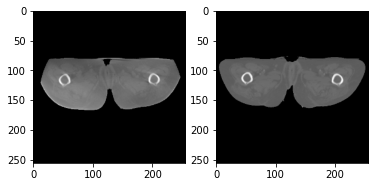

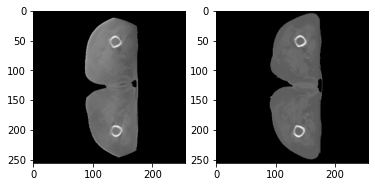

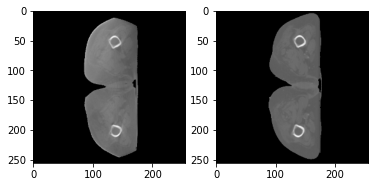

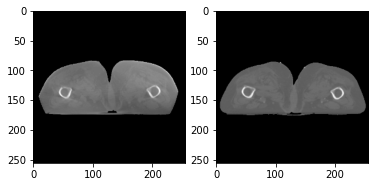

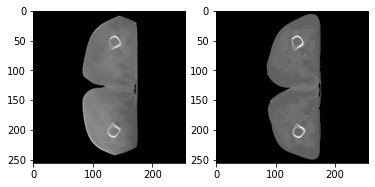

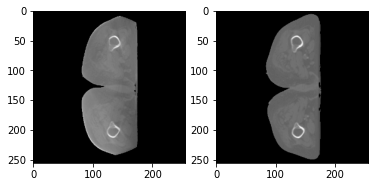

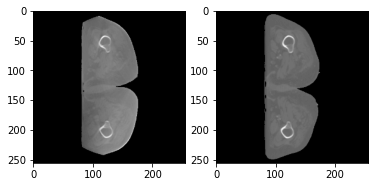

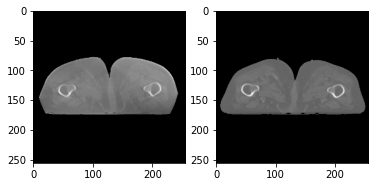

In [6]:
import matplotlib.pyplot as plt

for batch in train_ds.take(2):
    imgA_batch, imgB_batch = batch
    for imgA, imgB in zip(imgA_batch, imgB_batch):
        plt.subplot(121)
        plt.imshow(imgA[:,:,0], cmap="gray")
        plt.subplot(122)
        plt.imshow(imgB[:,:,0], cmap="gray")
        plt.show()